## **LIBRARY**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import zipfile
import glob
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pathlib

### **LOAD THE DATASET**

In [ ]:
# You can get the dataset and preprocessed dataset on the drive link below,you can copy the folder to your own google drive.
# https://drive.google.com/drive/folders/113RBqGn2YrB5u7D7OT9X5y6uMLAfpvRI?usp=sharing

In [ ]:
newdf = pd.read_csv('/content/drive/MyDrive/bangkit/newdf.csv')

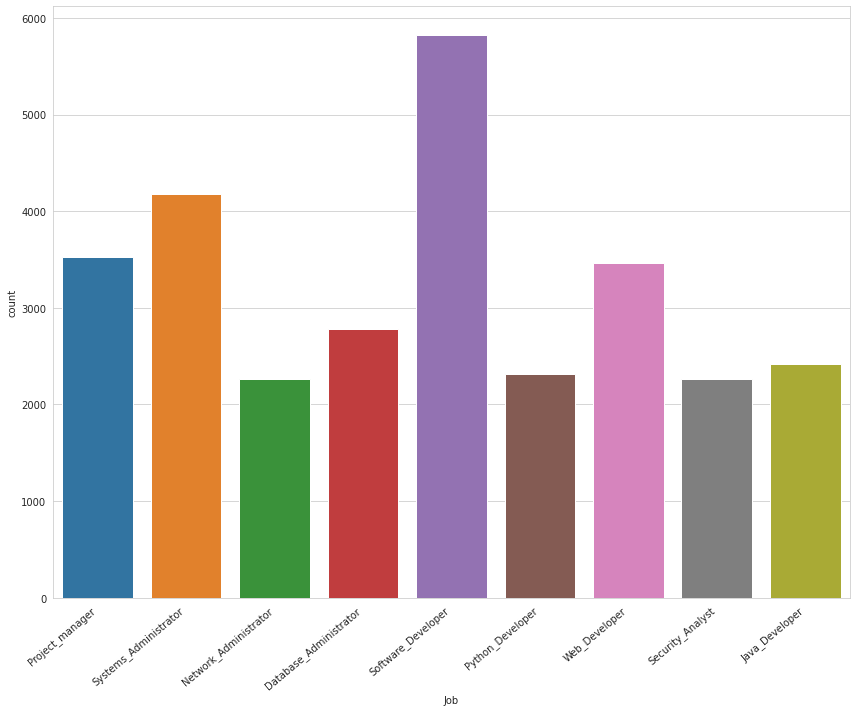

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Job', data=newdf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# **Baseline CNN-LSTM Model, GloVe Embedding**

In [6]:
vocab_size = 10000
embedding_dim = 100
max_length = 500
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
test_portion = .2

In [7]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ,"span"]

In [8]:
def clean_text(sentence):
    for word in stopwords:
      token = " " + word + " "
      sentence = str(sentence).replace(token, " ")
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence
    

In [9]:
with open("/content/drive/MyDrive/bangkit/newdf.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
      if any(c.isalpha() for c in row[0])==True and any(c.isalpha() for c in row[1])==True:
        labels.append(row[0])
        sen = row[1]
        sentence = clean_text(sen)
        sentences.append(sentence)
      else:
        pass

In [13]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * len(sentences))

test_sequences = padded[0:split]
training_sequences = padded[split:]
test_labels = labels[0:split]
training_labels = labels[split:]

In [14]:
label_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(training_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-24 05:25:25--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-24 05:25:25--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-24 05:25:25--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
#path_to_glove_file = os.path.join(
#    os.path.expanduser("~"), ".keras/datasets/glove.6B.100d.txt"
#)

embeddings_index = {}
with open("/content/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 62883 words (82186 misses)


In [ ]:
glovemodel = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length,embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
#    tf.keras.layers.Conv1D(128, 5, activation='relu'),
#    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu', kernel_regularizer=(tf.keras.regularizers.L2(0.001))),
    tf.keras.layers.Dense(10, activation='softmax')
])
glovemodel.summary()
glovemodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          14507000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 496, 32)           16032     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 124, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 120, 64)           10304     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 30, 64)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 30, 64)           

In [ ]:
num_epochs = 12
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = glovemodel.fit(training_sequences, training_label_seq, epochs=num_epochs, validation_data=(test_sequences, validation_label_seq), verbose=2, callbacks=[model_checkpoint_callback])

glovemodel.load_weights(checkpoint_path)

Epoch 1/12
726/726 - 103s - loss: 1.1862 - accuracy: 0.5799 - val_loss: 0.5446 - val_accuracy: 0.8383
Epoch 2/12
726/726 - 100s - loss: 0.5114 - accuracy: 0.8451 - val_loss: 0.4044 - val_accuracy: 0.8836
Epoch 3/12
726/726 - 100s - loss: 0.3790 - accuracy: 0.8907 - val_loss: 0.3020 - val_accuracy: 0.9160
Epoch 4/12
726/726 - 98s - loss: 0.3015 - accuracy: 0.9128 - val_loss: 0.2750 - val_accuracy: 0.9208
Epoch 5/12
726/726 - 98s - loss: 0.2659 - accuracy: 0.9236 - val_loss: 0.2578 - val_accuracy: 0.9334
Epoch 6/12
726/726 - 98s - loss: 0.2338 - accuracy: 0.9319 - val_loss: 0.2473 - val_accuracy: 0.9347
Epoch 7/12
726/726 - 98s - loss: 0.2168 - accuracy: 0.9369 - val_loss: 0.2265 - val_accuracy: 0.9371
Epoch 8/12
726/726 - 98s - loss: 0.1905 - accuracy: 0.9449 - val_loss: 0.2257 - val_accuracy: 0.9396
Epoch 9/12
726/726 - 97s - loss: 0.1778 - accuracy: 0.9491 - val_loss: 0.2158 - val_accuracy: 0.9394
Epoch 10/12
726/726 - 97s - loss: 0.1596 - accuracy: 0.9552 - val_loss: 0.2231 - val_acc

In [ ]:
glovemodel.load_weights(checkpoint_path)
glovemodel.save_weights('./checkpoints/my_checkpoint')

In [3]:
glovemodel.save('/content/drive/MyDrive/bangkit/glove_model.h5')
#glovemodel = tf.keras.models.load_model('/content/drive/MyDrive/bangkit/glove_model.h5')

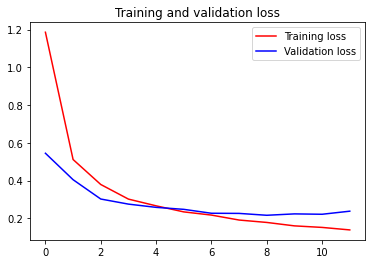

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

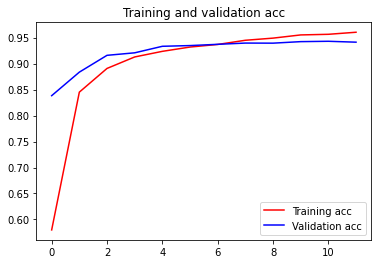

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend(loc=0)
plt.figure()


plt.show()

## Save Model to TFLite

In [ ]:
#Save model using tf.saved_model.save to converting the model to TFlite format
export_dir = '/content/drive/MyDrive/bangkit/Final Model'

tf.saved_model.save(glovemodel, export_dir)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/bangkit/Final Model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/bangkit/Final Model/assets


In [ ]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [optimization]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/bangkit/TFLite/model.tflite')
tflite_model_file.write_bytes(tflite_model)

14720144

# Try use the model to predict a string containing extracted resume informations

In [15]:
label_index = label_tokenizer.word_index
list(label_index.items())

[('software_developer', 1),
 ('systems_administrator', 2),
 ('project_manager', 3),
 ('web_developer', 4),
 ('database_administrator', 5),
 ('java_developer', 6),
 ('python_developer', 7),
 ('network_administrator', 8),
 ('security_analyst', 9)]

In [20]:
labs = [list(label_index.keys())]
inputs = "Serve as a liaison between business units/departments, C-Level management and government entities regarding security, compliance, data protection and identity management projects. Delivers security awareness/training to clients and workforce. Performs assessments of site/enterprise policies and configurations and evaluate compliance with regulations, industry best practices and enterprise directives while performing IT governance, risk and compliance analysis, design and implementation. Provides direct support to the business and IT staff for security related to identity and access issues. In addition, with more than 20 years of experience in the Information Technologies (IT) field devoted working in the Healthcare and in the Higher Education industry. Active DoD Security Clearance. Communicate effectively in English and Spanish. Authorized to work in United States for any employer Work Experience Volunteer Technical Mentor CyberPatriot - Columbus, GA October 2017 to Present The National Youth Cyber Education Program created by the Air Force Association (AFA) to inspire K-12 students toward careers in cybersecurity or other science, technology, engineering, and mathematics (STEM) disciplines critical to our nation's future. As a Technical Mentor I am a volunteer cyber-knowledgeable individual who helps CyberPatriot coaches and students prepare for the competition. Serves as technical advisor and role model to CyberPatriot teams. http://www.uscyberpatriot.org/ Senior Information Security Specialist Total System Services (TSYS) - Columbus, GA October 2016 to Present A Senior Cyber Threat Analyst role focused on detection, prevention and response to threats against the company network. Works with the best of breed security technology environment with global reach. Is also an integral part of the security controls that the organization uses to protect its data and intellectual property. Proactive monitoring and response of known and or emerging threats against the company network. Recognize and investigate intrusion attempts and perform in-depth analysis of exploits. Differentiate false positives from true intrusion attempts. Determine impact of potential intrusions on the company's network and infrastructure Conduct cyber intelligence analysis, coordination, and interaction across the company's networks and infrastructure components. Conduct detailed security event analysis from network traffic attributes and host-based attributes (memory analysis, binary analysis, etc.) to identify information security incidents. Provide expertise to support timely and effective decision making of when to declare an incident. Provide incident response support when analysis confirms actionable incident, this includes implementation of containment, protection, and remediation activities. Document all activities during an incident and providing leadership with status updates. Correlate threat data from various sources. Conduct research and evaluate threat intelligence to develop in-depth analysis and assessment on threats to critical networks and infrastructure components. Publish incidents, alerts, advisories, and bulletins as required. Expand the usage of security monitoring tools to improve the security of the environment, including detection, prevention and policy enforcement; define security configuration for monitoring tools, including alerts, correlation rules and reporting. Build and maintain common Indicators of Compromise to hunt throughout the environment for security events. Lead cyber security incident investigations. Stay abreast of latest vulnerabilities, exploits and other relevant threat-related information. Conduct analysis and trending of security log data. Coach and mentor Level 1 security analysts. Assist with the development of processes and procedures to improve incident response times, analysis of incidents, and overall Threat Management Center functions. IT Security Analyst Medical Card System Inc. (MCS) - San Juan, PR July 2014 to October 2016 Deploy, configure, and monitor security technology and controls to ensure compliance with the different service levels and thresholds of acceptable levels of security. Conduct regular vulnerability assessments of IT assets of the organization and ensures that managers carry out a Corrective Action Plan for the findings encountered on the vulnerability report to mitigate risks of data loss. First level of response to security incidents occurring in the organization. Evaluate, authorize and process access based by job functions/roles to ensure levels of segregation to guarantee compliance with the security policies. Manage security patches of IT systems with the purpose to mitigate the existing vulnerabilities as low as possible. Evaluate, recommend and implement new technologies to minimize security risks. Promote and ensure the confidentiality, integrity and availability of the assets of the organization. Design, develop, document and reinforce policies, procedures and standards of information security, as well as promoting compliance with international standards and regulations, in conjunction with local and federal laws applicable to the industry, business, and employment practices. Perform technical (evaluation of technology) and nontechnical (evaluation of people and operations) risk and vulnerability assessments of relevant technology focus areas. Prepare audit reports that identify technical and procedural findings and provide recommended remediation strategies/solutions. Perform internal IT audit assessment, documentation, responses, and monitoring. Mentoring other team members and providing knowledge in Security, Federal/State regulations, Audit, and Compliance. Provide security awareness to clients and workforce. Analyze site/enterprise policies and configurations and evaluate compliance with regulations and enterprise directives performing IT Governance, Risk and Compliance analysis, design and implementation. Monitor corporate Information Security Program compliance and effectiveness in coordination with the organization other compliance and operational assessment functions. Initiates, facilitates and promotes activities to foster information security awareness within the organization and related entities. Oversee, direct, deliver and ensure delivery of initial and recurring security training and orientation to all employees, volunteers, medical and professional staff, contractors, alliances, business associates, and other appropriate third parties. Represent the IT Security Unit in the IT Process Analysis Committee for audit and security management, the Change Advisory Board for reviewing change requests for risk and unintended consequences, advice on findings and recommendations, and security liaison for the HIPAA Security Officer. Security and Privacy Analyst Medical Card System Inc. (MCS) - San Juan, PR December 2009 to July 2014 Attained management of internal security and privacy projects to ensure regulations compliance with HIPAA/HITECH, DACO, insurance commissioner, etc. Spearheaded investigations and registry reports of security and privacy breaches. Succeeded performing Security and Privacy audits. Recommended and analyzed logical and physical security. Documented a systematic, organized approach to managing Governance, Risk, and Compliance related strategy and implementation, assisting in the integration and management of IT operations that are subject to regulation. Managed de coordination of data between multiple departments within the Organization including, but not limited to, IT, Security, Compliance, and Audit while analyzing and creating integrity procedures, policies, controls and audits using GRC software. Composed letters for policyholders, courts and/or representatives in cases of confidential information of the policyholders. Succeeded provisioning and de-provisioning access to internal applications that carry confidential information. Edited and composed security and privacy policies in accord with federal and state regulations. Served as a member of the organization's Risk Management Committee conducting investigations of information security violations and computer crime. Worked with organization administration, legal counsel, and other related parties to represent the organization's information security interests with external parties. Examined the Information Security Program compliance and effectiveness in coordination with the organizations other compliance and operational assessment functions. Revised all system-related information security plans throughout the organization's network to ensure alignment between security and privacy practices acting as a liaison to the information systems department. Science Researcher Medical Card System Inc. (MCS) - San Juan, PR January 2010 to December 2010 Mentored as a computer science researcher to pre-college students. Students performing the research obtained first prize in the spring 2010 Pre-College Research Symposium. http://www.suagm.edu/umet/im/pdf/Symposia/Proceedings_Spring_2010.pdf Systems Security Analyst Medical Card System Inc. (MCS) - San Juan, PR May 2004 to December 2009 Investigated and analyzed breaches of the corporate network and its assets. Succeeded monitoring the network resources for weak security and improvements. Designed and implemented with Firewalls, IDS/IPS, Antivirus, Patch management and other IT security technologies. Directed as a Team Leader of the Cyber Security Incident Response Team. Created, consulted and recommended on new security procedures and policies. Supervised and collaborated with the organization's Systems Security Coordinators. Performed Reverse Engineering to Malware and any threat affecting the organization. Designed, implemented and executed automatization of enterprise security systems. Performed Penetration testing and Risk/Vulnerability assessments to the organization's network, systems, and applications using OWASP, CERT and SANS concepts, best practices, and standards. Systems Security Coordinator Medical Card System Inc. (MCS) - San Juan, PR May 2003 to May 2004 Exceeded the designing and implementation of the information security program on the main campus. Completed the implementation and management of IT security tools, systems, policies, and procedures that meet national and international network security standards. Completed tests and evaluations of security products. Authored a contingency plan for disaster recovery in the event of security breaches. Co-authored and supervise backup procedures. Performed Penetration testing and Risk/Vulnerability assessments to minimize potential threats/breaches on the organization's systems. Investigated actual breaches and carry out corrective actions on a timely manner. Authored and documented reports for technical and nontechnical users. Education Masters in Networking & Telecommunication Universidad Del Turabo Gurabo, Puerto Rico, US Bachelor in Science in Computer Science Universidad Metropolitana San Juan, PR Skills SECURITY (10+ years), GOVERNANCE (6 years), HIPAA (6 years), OPERATIONS (6 years), INCIDENT RESPONSE (6 years), Splunk (2 years) Links https://www.linkedin.com/in/joelriveramontes Certifications/Licenses Certified Ethical Hacker (CEH) Present Network + Present Additional Information SPECIALTIES  HIPAA/HITECH, Gramm-Leach-Bliley (GLB), FISMA, Sarbanes-Oxley (SOX), Data Protection and Freedom of Information Acts  OCTAVE Security and SDLC methodologies  COBIT, ITIL, Agile/Scrum, NIST SP 800 series and Kill Chain frameworks  PCI DSS, NIST, FIPS, SSAE 16, BS7799, ISO/IEC 31000, 17999 and its successor (ISO/IEC 27000 series) standards  IT Governance, IT Risk, and IT Compliance  IT Security Auditor and Analyst SKILLS Computer/Network Security Software Documentation Policies and Procedure Application Security Windows/Linux Desktop and Server OS Security Assessment Business Continuity Data Privacy/Security IT/Security Operations Disaster Recovery LAN/WAN, Wireless Security Analysis Active Directory IT/Security Management Teaching/Awareness/Mentoring SFTP IT/Security Audits Supervising VPN Physical Security Project Management DLP Computer Forensics Virtualization Administration SIEM IDS/IPS Team Leader Firewalls Identity Management Incident Response Team Troubleshooting Antivirus Management PGP and Encryption Services Web Filtering Endpoint Protection Customer Service Penetration Testing Authentication/Access Management Compliance and Policy Enforcement Secure Source Code Review AD Group Policy Cybersecurity Microsoft Office (all products) Risk Assessment Cloud Computing System Administration Compliance Assessment Reverse Engineering Vulnerability Assessment Network Administration Mid-Level Programming/Scripting Patch Management IT Strategy Threat Assessment Technical Support Ethical Hacker OWASP, CERT, and SANS Knowledge"
clean_inputs = [clean_text(inputs)]
print(str(clean_inputs)+'\n')
seq = tokenizer.texts_to_sequences(clean_inputs)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(str(padded)+'\n')
proba = glovemodel.predict(padded)[0,1:]
#print only max value
max = np.where(proba == np.amax(proba))
for [i] in max:
  idx = i
predlabel = labs[0][idx]
predprob = proba[idx]*100
print(list(map("This resume is fit to {} jobs with probability of {:.2f}%".format,[predlabel],[predprob])))

for (label, p) in zip(labs, [proba]):
  print("Probability for each classes are : " + str(list(map("{}: {:.2f}%".format,label,p*100))))

['Serve liaison business units departments Level management government entities regarding security compliance data protection identity management projects Delivers security awareness training clients workforce Performs assessments site enterprise policies configurations evaluate compliance regulations industry best practices enterprise directives performing IT governance risk compliance analysis design implementation Provides direct support business IT staff security related identity access issues In addition years experience Information Technologies IT field devoted working Healthcare Higher Education industry Active DoD Security Clearance Communicate effectively English Spanish Authorized work United States employer Work Experience Volunteer Technical Mentor CyberPatriot Columbus GA October Present The National Youth Cyber Education Program created Air Force Association AFA inspire students toward careers cybersecurity science technology engineering mathematics STEM disciplines criti